In [ ]:
from openai import OpenAI
from datasets import load_from_disk

import base64
from io import BytesIO

from dotenv import load_dotenv

load_dotenv()

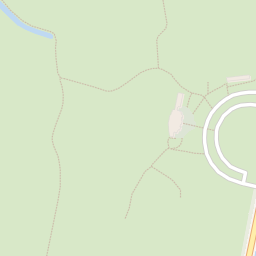

In [5]:
dataset = load_from_disk("../../data/dataset/input")
image = dataset[0]["image"]
image

In [6]:
buffered = BytesIO()
image.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

In [7]:
prompt = "Describe provided image representing OSM map tile."

In [8]:
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{img_str}",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

The image depicts a simple OpenStreetMap (OSM) map tile. The tile features a light green background representing open land or vegetation. There are thin, dashed lines suggesting paths or roads. Additionally, there are some identifiable shapes that may represent buildings or landmarks, particularly a circular structure. A small blue line indicates the presence of a water body, such as a river or stream, flowing through the area. Overall, the map appears to show a rural or undeveloped landscape with minimal detailing.
